<a href="https://colab.research.google.com/github/170294r/Pump-it-Up-Data-Mining-the-Water-Table-/blob/main/pumpit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 5.1 MB/s 


In [2]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv
Saving clean_data_test.csv to clean_data_test.csv


In [33]:
import io
df = pd.read_csv(io.BytesIO(uploaded['clean_data.csv']))
df_test = pd.read_csv( io.BytesIO(uploaded['clean_data_test.csv']))

In [34]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )
df_test.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [35]:
df1= df.copy()
df_test1= df_test.copy()

In [36]:
df1.drop(columns=['lga','ward'],inplace=True )
df_test1.drop(columns=['lga','ward'],inplace=True )

In [37]:
df1['permit'] = df1['permit'].astype(bool).astype(int)
df_test1['permit'] = df_test1['permit'].astype(bool).astype(int)
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)
df_test1['public_meeting'] = df_test1['public_meeting'].astype(bool).astype(int)

In [38]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [39]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [40]:
target='status_group'

In [41]:
# seperate columns to X,y 
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [42]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
df_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info']) # to see all results

In [44]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# make predictions on given_test set
y_pred_test_set = pipe.predict(df_test1)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9201599326599327
TEST: 0.7961279461279461

Balanced Accuracy:
TRAIN: 0.932632310756815
TEST: 0.7123422369073463


In [45]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.712 , 
       'train_balanced_acc' : 0.933,
               'info' : 'gridsearch best param'}, ignore_index=True)

In [46]:
X_test

,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
2980,0,31.985658,-3.596360,Lake Tanganyika,Shinyanga,5,281,1,1,other,wug,unknown,soft,dry,shallow well,other,0,DWE,Others
5246,0,32.832815,-4.944937,Lake Tanganyika,Tabora,6,281,1,1,india mark ii,vwc,never pay,milky,insufficient,shallow well,hand pump,0,Others,Others
22659,1675,35.488289,-4.242048,Internal,Manyara,1,148,1,1,gravity,water board,pay per bucket,soft,insufficient,spring,communal standpipe,00s,DWE,Others
39888,0,33.140828,-9.059386,Lake Rukwa,Mbeya,6,281,0,0,nira/tanira,vwc,never pay,soft,seasonal,shallow well,hand pump,0,KKKT,Kkkt
13361,1109,34.217077,-4.430529,Internal,Singida,1,235,1,1,mono,wua,pay per bucket,soft,enough,machine dbh,communal standpipe multiple,10s,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17841,1775,34.588725,-9.789187,Lake Nyasa,Iringa,5,530,1,0,gravity,vwc,pay monthly,soft,enough,spring,communal standpipe,00s,Others,Others
20222,1850,36.645251,-3.252351,Pangani,Arusha,2,150,1,1,gravity,vwc,pay when scheme fails,soft,enough,spring,other,90s,DWE,Government Of Tanzania
40219,0,30.543984,-2.488919,Lake Victoria,Kagera,30,281,1,0,gravity,vwc,never pay,soft,dry,spring,communal standpipe,0,DWE,Danida
19599,642,37.594612,-6.062619,Wami / Ruvu,Morogoro,6,1,1,1,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,00s,Others,Others


Accuracy:
TRAIN: 0.7888888888888889
TEST: 0.7801346801346801

Balanced Accuracy:
TRAIN: 0.614396263296231
TEST: 0.6046213114508435


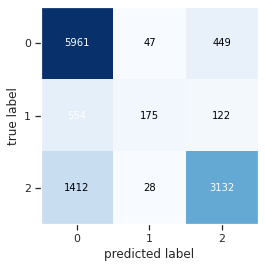

In [51]:
#seting model
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 10, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# predictions on test dataset
y_pred_test_set2 = pipe.predict(df_test1)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [52]:
df_y_pred_test_set2= pd.DataFrame(y_pred_test_set2)

In [53]:
target_status_group = {0:'functional', 
                    2 :'non functional', 
                    1 :'functional needs repair'} 
df_y_pred_test_set2["status_group"] = df_y_pred_test_set2[0].replace(target_status_group)

In [54]:
df_y_pred_test_set2.drop(columns=[0],inplace=True )

In [56]:
df_y_pred_test_set2.to_csv('170294r_2.csv')
from google.colab import files
files.download("170294r_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:
TRAIN: 0.8434974747474747
TEST: 0.8018518518518518

Balanced Accuracy:
TRAIN: 0.6840797548690926
TEST: 0.6314626674611675


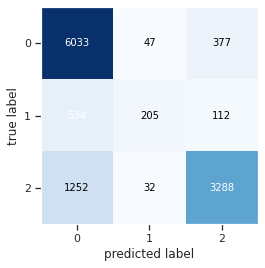

In [68]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)
# predictions on test dataset
y_pred_test_set3 = pipe.predict(df_test1)
# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [64]:
df_y_pred_test_set3= pd.DataFrame(y_pred_test_set3)

In [65]:
target_status_group = {0:'functional', 
                    2 :'non functional', 
                    1 :'functional needs repair'} 
df_y_pred_test_set3["status_group"] = df_y_pred_test_set3[0].replace(target_status_group)

In [66]:
df_y_pred_test_set3.drop(columns=[0],inplace=True )

In [67]:
df_y_pred_test_set3.to_csv('170294r_3.csv')
from google.colab import files
files.download("170294r_3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
df4=df1.copy()
df_test4=df_test1.copy()

In [ ]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    df4[str(c) + '_encoded'] = encoder.fit_transform(df4[c].values, df4[target])
    df4.drop(columns=c, inplace=True)

In [82]:
cat_col

['basin',
 'region',
 'extraction_type_group',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'decade',
 'installer_cat',
 'funder_cat']

In [83]:
# Encoding test data
test_encoded = encoder.transform(df_test4['basin'])

KeyError: ignored

In [76]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_test4[col])),columns=[col])
    return df

scaled_df_test = scaleColumns(df_test4,[num_col])

In [ ]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df4[col])),columns=[col])
    return df

scaled_df = scaleColumns(df4,[num_col])

In [72]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [73]:
# making over-sampling 

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_sample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64
2    32259
1    32259
0    32259
dtype: int64


In [74]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [75]:
# setting classifier
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9708993683884217
TEST: 0.8650030998140111

Balanced Accuracy:
TRAIN: 0.9709046724071451
TEST: 0.8649666678706959
